##Email: To Spam Or Not To Spam?

Last Updated: 4/30/2024

Group Members: Sohaib Chachar, Jennifer Kane, Brian Brisson, Michelle Bautista, Amiri Hayes

Goal: Classify emails as spam or not spam.

Dataset: https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset

###1. Sohaib: Data Cleaning & NLP


In [ ]:
import pandas as pd
data = pd.read_csv('emails.csv')
data_info = data.info()
data_head = data.head()

data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


(None,
                                                 text  spam
 0  Subject: naturally irresistible your corporate...     1
 1  Subject: the stock trading gunslinger  fanny i...     1
 2  Subject: unbelievable new homes made easy  im ...     1
 3  Subject: 4 color printing special  request add...     1
 4  Subject: do not have money , get software cds ...     1)

In [ ]:
null_values = data.isnull().sum()
duplicate_rows = data.duplicated().sum()
print('Null values in column:')
print(null_values)
print('Duplicated values: ',duplicate_rows)

Null values in column:
text    0
spam    0
dtype: int64
Duplicated values:  33


<ipython-input-3-4bff18188b18>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spam_distribution.index, y=spam_distribution.values, palette="Blues_d")


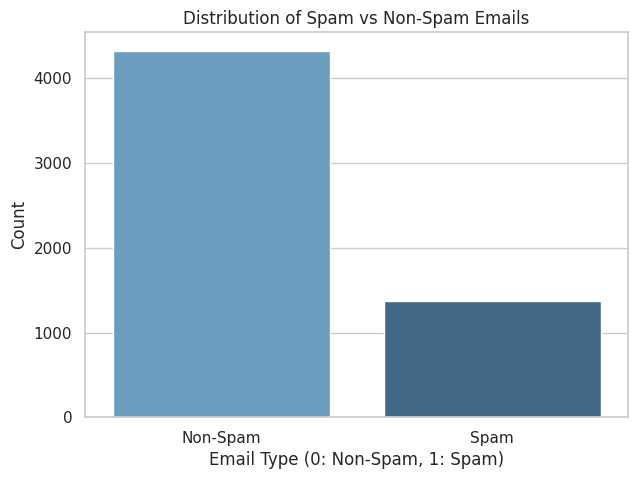

New shape after removing duplicate rows:  (5695, 2)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_cleaned = data.drop_duplicates()
new_shape = data_cleaned.shape

sns.set(style="whitegrid")
spam_distribution = data_cleaned['spam'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=spam_distribution.index, y=spam_distribution.values, palette="Blues_d")
plt.title('Distribution of Spam vs Non-Spam Emails')
plt.xlabel('Email Type (0: Non-Spam, 1: Spam)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])

plt.show()
print('New shape after removing duplicate rows: ',new_shape)

<ipython-input-4-a0459262d2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['length'] = data_cleaned['text'].apply(len)
<ipython-input-4-a0459262d2bb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_length_by_category.index, y=average_length_by_category.values, palette="coolwarm")


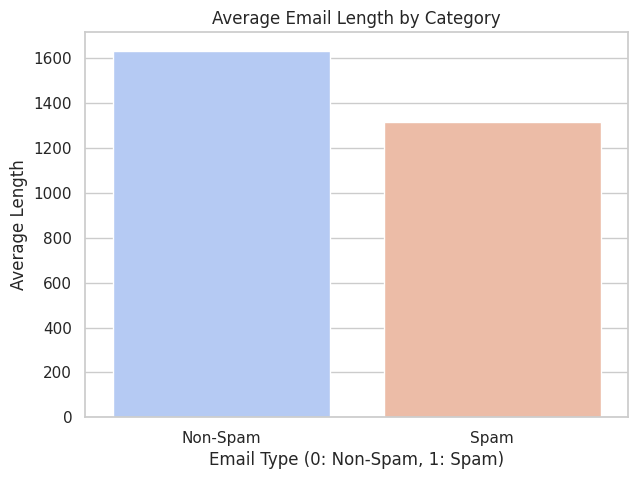

(None,
 spam
 0    1634.200139
 1    1317.257310
 Name: length, dtype: float64)

In [ ]:
data_cleaned['length'] = data_cleaned['text'].apply(len)
average_length_by_category = data_cleaned.groupby('spam')['length'].mean()

plt.figure(figsize=(7, 5))
sns.barplot(x=average_length_by_category.index, y=average_length_by_category.values, palette="coolwarm")
plt.title('Average Email Length by Category')
plt.xlabel('Email Type (0: Non-Spam, 1: Spam)')
plt.ylabel('Average Length')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])

plt.show(), average_length_by_category

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def clean_text_to_tokens(text):
    text = re.sub(r'\S*@\S*\s?', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return tokens


data_cleaned['tokens'] = data_cleaned['text'].apply(clean_text_to_tokens)
data_cleaned[['text', 'tokens']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
<ipython-input-5-a55b49a8bffc>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['tokens'] = data_cleaned['text'].apply(clean_text_to_tokens)


,text,tokens
0,Subject: naturally irresistible your corporate...,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,"[subject, unbelievable, new, home, made, easy,..."
3,Subject: 4 color printing special request add...,"[subject, color, printing, special, request, a..."
4,"Subject: do not have money , get software cds ...","[subject, money, get, software, cd, software, ..."


In [ ]:
data_cleaned

,text,spam,length,tokens
0,Subject: naturally irresistible your corporate...,1,1484,"[subject, naturally, irresistible, corporate, ..."
1,Subject: the stock trading gunslinger fanny i...,1,598,"[subject, stock, trading, gunslinger, fanny, m..."
2,Subject: unbelievable new homes made easy im ...,1,448,"[subject, unbelievable, new, home, made, easy,..."
3,Subject: 4 color printing special request add...,1,500,"[subject, color, printing, special, request, a..."
4,"Subject: do not have money , get software cds ...",1,235,"[subject, money, get, software, cd, software, ..."
...,...,...,...,...
5723,Subject: re : research and development charges...,0,1189,"[subject, research, development, charge, gpg, ..."
5724,"Subject: re : receipts from visit jim , than...",0,1167,"[subject, receipt, visit, jim, thanks, invitat..."
5725,Subject: re : enron case study update wow ! a...,0,2131,"[subject, enron, case, study, update, wow, day..."
5726,"Subject: re : interest david , please , call...",0,1060,"[subject, interest, david, please, call, shirl..."


<ipython-input-7-03be92b5900e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')
<ipython-input-7-03be92b5900e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')


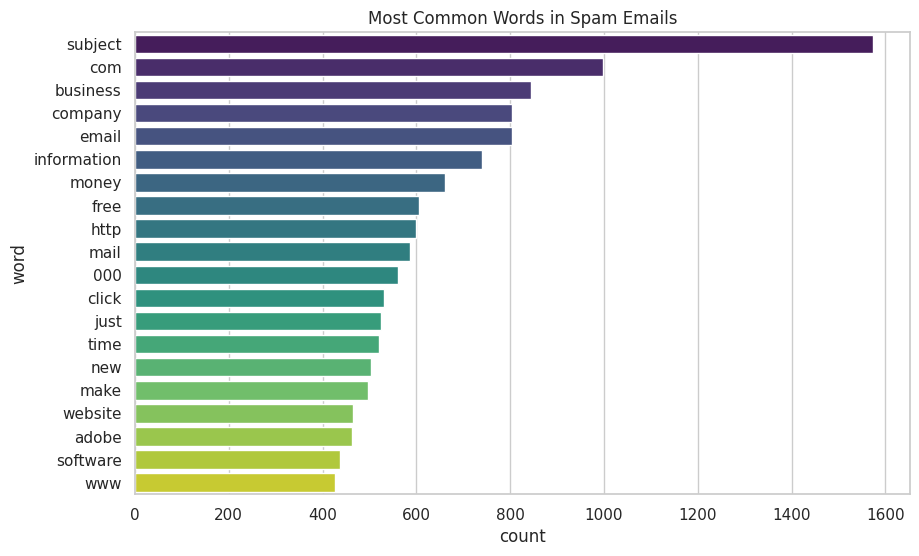

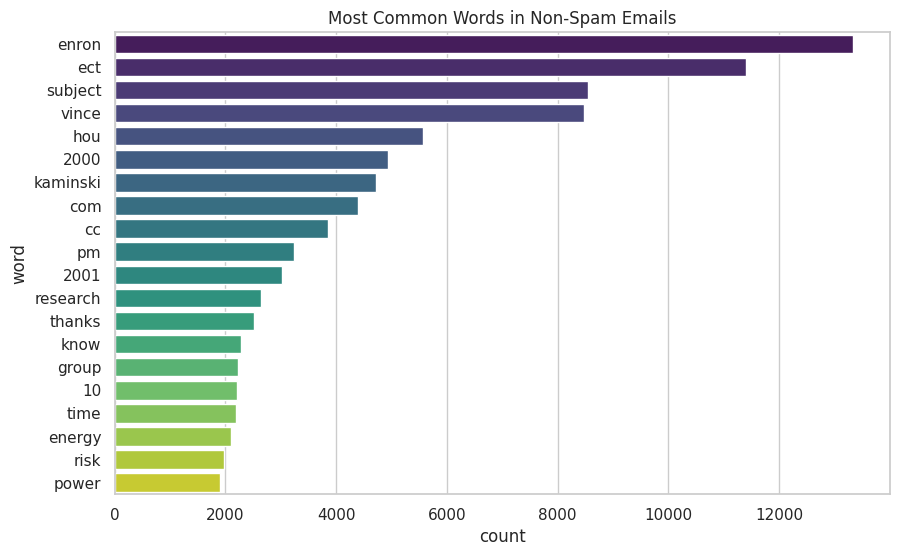

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def plot_most_common_words(text_series, title, n=20):
    cv = CountVectorizer(stop_words='english')
    words = cv.fit_transform(text_series)
    sum_words = words.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

    common_words = words_freq[:n]
    common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')
    plt.title(title)

spam_emails = data_cleaned[data_cleaned['spam'] == 1]['text']
non_spam_emails = data_cleaned[data_cleaned['spam'] == 0]['text']

plot_most_common_words(spam_emails, 'Most Common Words in Spam Emails')
plot_most_common_words(non_spam_emails, 'Most Common Words in Non-Spam Emails')

<ipython-input-8-b83261086591>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['subject'] = data_cleaned['text'].apply(lambda x: x.split('Subject: ')[1].split(' ')[0] if 'Subject: ' in x else '')
<ipython-input-7-03be92b5900e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=common_words_df, palette='viridis')
<ipython-input-7-03be92b5900e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word',

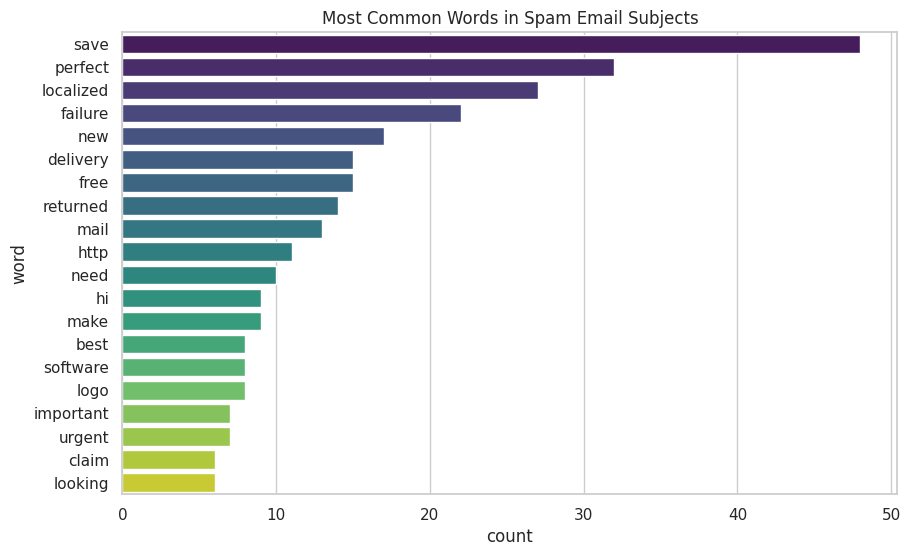

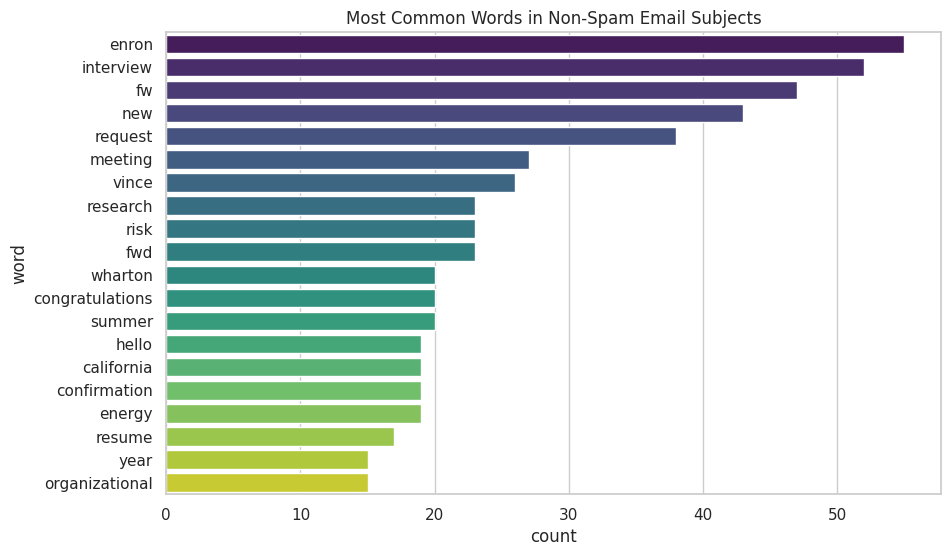

In [ ]:
data_cleaned['subject'] = data_cleaned['text'].apply(lambda x: x.split('Subject: ')[1].split(' ')[0] if 'Subject: ' in x else '')

plot_most_common_words(data_cleaned[data_cleaned['spam'] == 1]['subject'], 'Most Common Words in Spam Email Subjects')
plot_most_common_words(data_cleaned[data_cleaned['spam'] == 0]['subject'], 'Most Common Words in Non-Spam Email Subjects')

<ipython-input-9-e9df603d464a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['sentiment'] = data_cleaned['text'].apply(calculate_sentiment)
<ipython-input-9-e9df603d464a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_sentiment_by_category.index, y=average_sentiment_by_category.values, palette="RdBu_r")


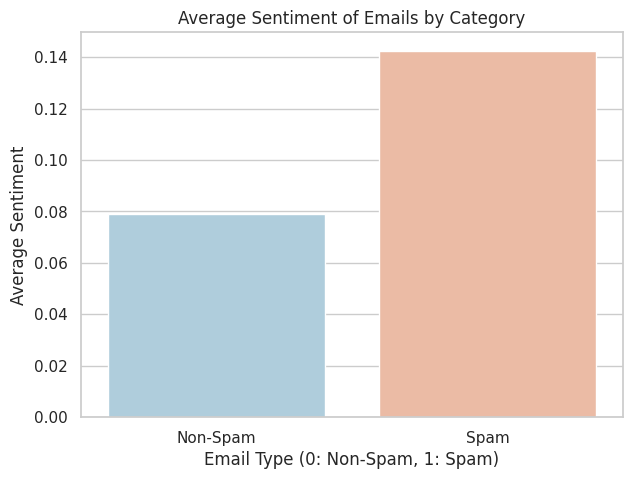

(None,
 spam
 0    0.078827
 1    0.142522
 Name: sentiment, dtype: float64)

In [ ]:
from textblob import TextBlob
def calculate_sentiment(text):
    return TextBlob(text).sentiment.polarity

data_cleaned['sentiment'] = data_cleaned['text'].apply(calculate_sentiment)

average_sentiment_by_category = data_cleaned.groupby('spam')['sentiment'].mean()

plt.figure(figsize=(7, 5))
sns.barplot(x=average_sentiment_by_category.index, y=average_sentiment_by_category.values, palette="RdBu_r")
plt.title('Average Sentiment of Emails by Category')
plt.xlabel('Email Type (0: Non-Spam, 1: Spam)')
plt.ylabel('Average Sentiment')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])

plt.show(), average_sentiment_by_category

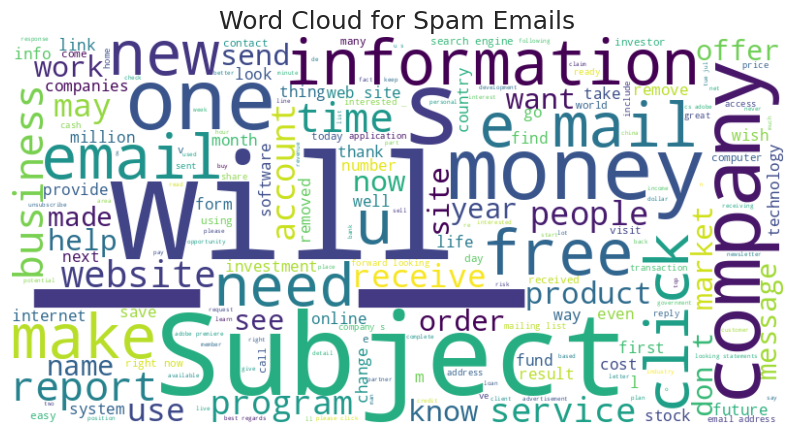

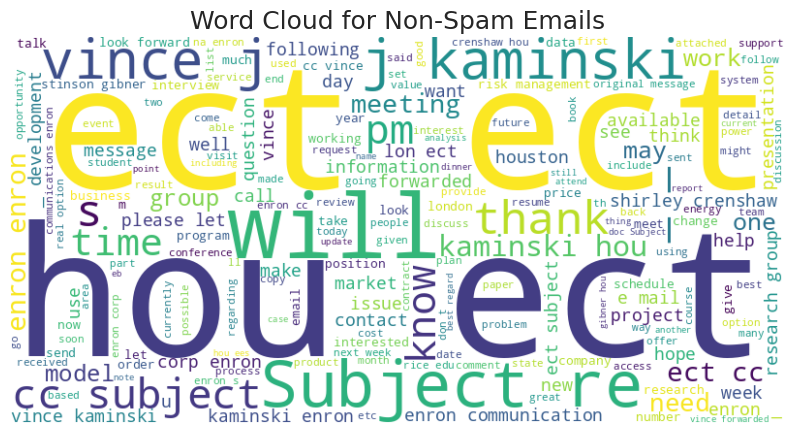

In [ ]:
from wordcloud import WordCloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(text)
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18)
    plt.axis('off')
    plt.show()

spam_text = " ".join(email for email in data_cleaned[data_cleaned['spam'] == 1]['text'])
generate_word_cloud(spam_text, 'Word Cloud for Spam Emails')

non_spam_text = " ".join(email for email in data_cleaned[data_cleaned['spam'] == 0]['text'])
generate_word_cloud(non_spam_text, 'Word Cloud for Non-Spam Emails')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
data_cleaned['clean_text'] = data_cleaned['tokens'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features for efficiency

X_tfidf = tfidf_vectorizer.fit_transform(data_cleaned['clean_text'])
y = data_cleaned['spam']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


<ipython-input-11-3b54ad0c7c03>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['clean_text'] = data_cleaned['tokens'].apply(lambda tokens: ' '.join(tokens))


###2. Jenn: Random Forest Classification


Accuracy: 0.9806848112379281
Precision: 0.9928057553956835
Recall: 0.9324324324324325
F1-score: 0.9616724738675959


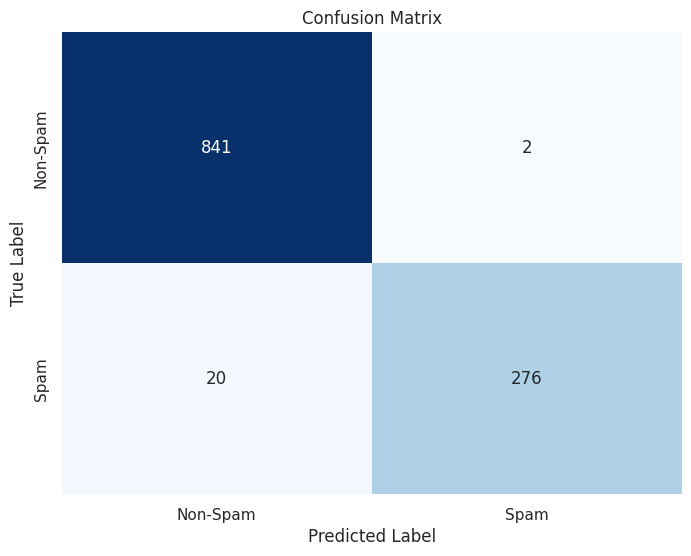

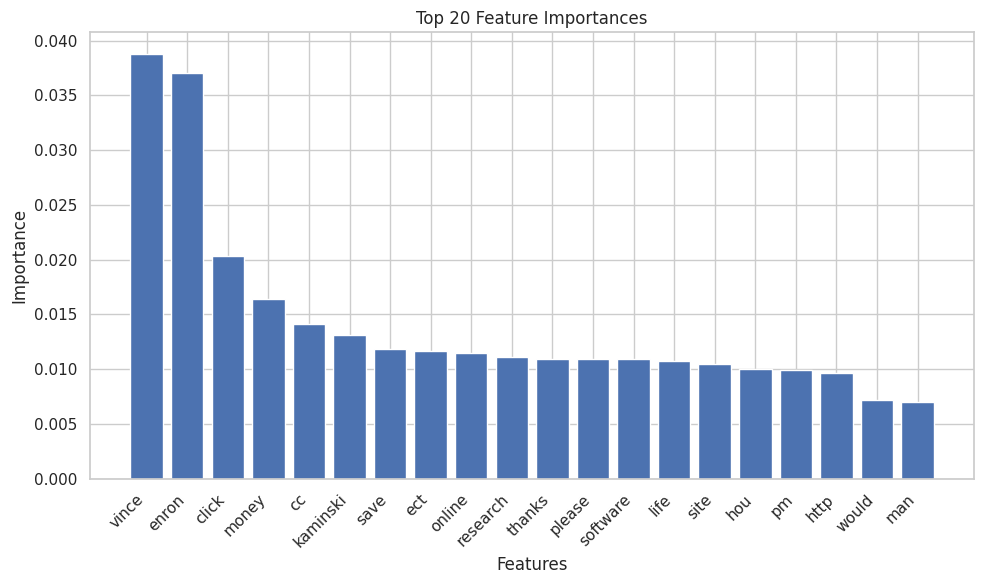

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


# Train the Random Forest Classifier on the training data
rf_classifier.fit(X_train, y_train)


# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


# Get feature importances from the trained Random Forest Classifier
importances = rf_classifier.feature_importances_
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]
# Set the number of top features to display
top_features = 20


# Create a bar plot of the top feature importances
plt.figure(figsize=(10, 6))
plt.title(f'Top {top_features} Feature Importances')
plt.bar(range(top_features), importances[indices[:top_features]])
plt.xticks(range(top_features), [tfidf_vectorizer.get_feature_names_out()[i] for i in indices[:top_features]],
rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

###3. Brian: Naive Bayes Classification


dict_keys(['alpha', 'class_prior', 'fit_prior', 'force_alpha'])
Acc:  0.9780509218612818
F1:  0.956369982547993
Acc_tuned:  0.9841966637401229
F1_tuned:  0.9690721649484535

Train Acc_tuned:  0.9938542581211589
Classification Report:
              precision    recall  f1-score   support

           0    0.98359   0.99526   0.98939       843
           1    0.98601   0.95270   0.96907       296

    accuracy                        0.98420      1139
   macro avg    0.98480   0.97398   0.97923      1139
weighted avg    0.98422   0.98420   0.98411      1139



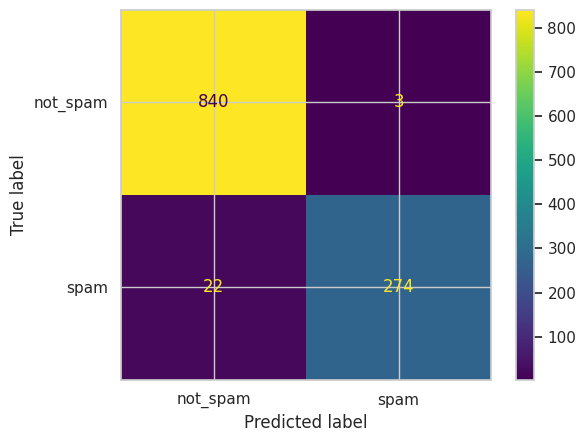

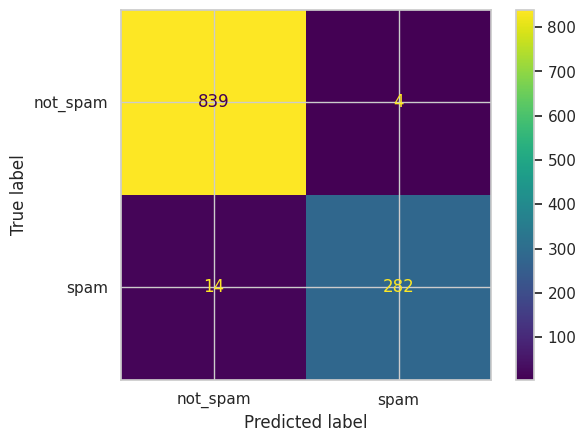

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#make the Navie Bayes model
naive_model = MultinomialNB()
naive_model.fit(X_train, y_train)
print(naive_model.get_params().keys())

from sklearn.metrics import (accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, classification_report)
from sklearn.model_selection import GridSearchCV

#eval model
y_pred = naive_model.predict(X_test)
f1 = f1_score(y_pred, y_test)

#print resutls
print("Acc: ", accuracy_score(y_pred, y_test))
print("F1: ", f1)

classes = ["not_spam", "spam"]
display_matrix = confusion_matrix(y_test,y_pred)
display = ConfusionMatrixDisplay(display_matrix, display_labels=classes)
display.plot()

#Tune alpha parameter
param = {'alpha': [1.0, 0.1, 0.01, 0.001]}
tuned_naives = GridSearchCV(naive_model,param,cv=10)
tuned_naives.fit(X_train, y_train)

#eval model
y_pred_tuned = tuned_naives.predict(X_test)
f1 = f1_score(y_pred_tuned, y_test)
train_accuracy = tuned_naives.score(X_train, y_train)

#print resutls
print("Acc_tuned: ", accuracy_score(y_pred_tuned, y_test))
print("F1_tuned: ", f1)

classes = ["not_spam", "spam"]
display_matrix = confusion_matrix(y_test,y_pred_tuned)
display = ConfusionMatrixDisplay(display_matrix, display_labels=classes)
display.plot()
# classification report
print("\nTrain Acc_tuned: ", train_accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned, digits=5))

###4. Michelle: K-Nearest Neighbors Classification

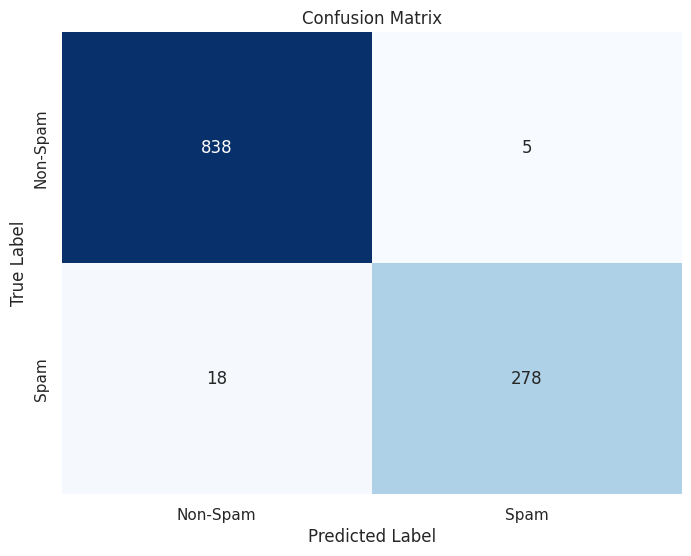

Training Accuracy: 0.9833187006145742

Classification Report:
              precision    recall  f1-score   support

           0    0.97897   0.99407   0.98646       843
           1    0.98233   0.93919   0.96028       296

    accuracy                        0.97981      1139
   macro avg    0.98065   0.96663   0.97337      1139
weighted avg    0.97985   0.97981   0.97966      1139



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# setup the KNN Classifier and model
knn_classifier = KNeighborsClassifier(n_neighbors=9, metric='minkowski', p=2)
model = knn_classifier

# fit the model
model.fit(X_train, y_train)

# predict on test data
y_pred = model.predict(X_test)

# training accuracy
train_accuracy = model.score(X_train, y_train)
# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# training accuracy and classification report
print("Training Accuracy:", train_accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=5))

###5. Amiri: Logistic Regression


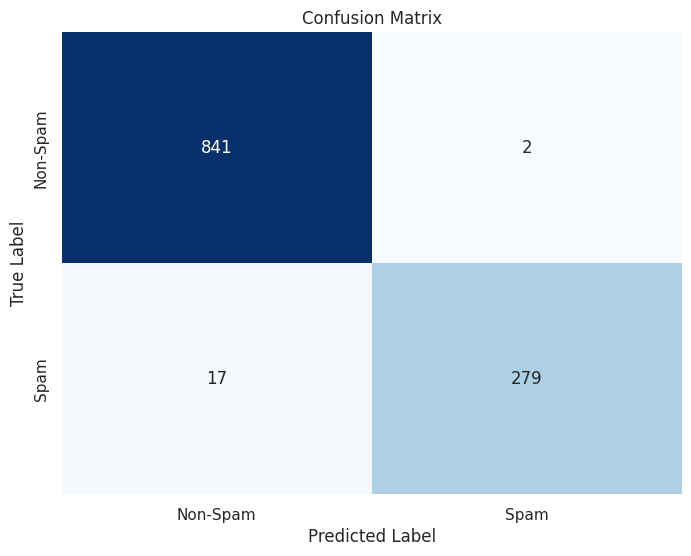

Training Accuracy: 0.9947322212467077

Classification Report:
              precision    recall  f1-score   support

           0    0.98019   0.99763   0.98883       843
           1    0.99288   0.94257   0.96707       296

    accuracy                        0.98332      1139
   macro avg    0.98653   0.97010   0.97795      1139
weighted avg    0.98349   0.98332   0.98318      1139



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Create an instance of Logistic Regression
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = model.score(X_train, y_train)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Non-Spam', 'Spam'], yticklabels=['Non-Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Training Accuracy:", train_accuracy)

# classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=5))